In [11]:
#Import libraries & modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset

df = pd.read_csv('hotel_review_data_cleaned.csv')


In [ ]:
# Vectorize the data

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['reviews'])
y = df['sentiment']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict the sentiment on the testing set
y_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7579387990762124
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67      1200
           1       0.39      0.22      0.28      1134
           2       0.84      0.90      0.87      4594

    accuracy                           0.76      6928
   macro avg       0.62      0.61      0.61      6928
weighted avg       0.73      0.76      0.74      6928



Confusion Matrix:
 [[ 857  154  189]
 [ 292  245  597]
 [ 220  225 4149]]


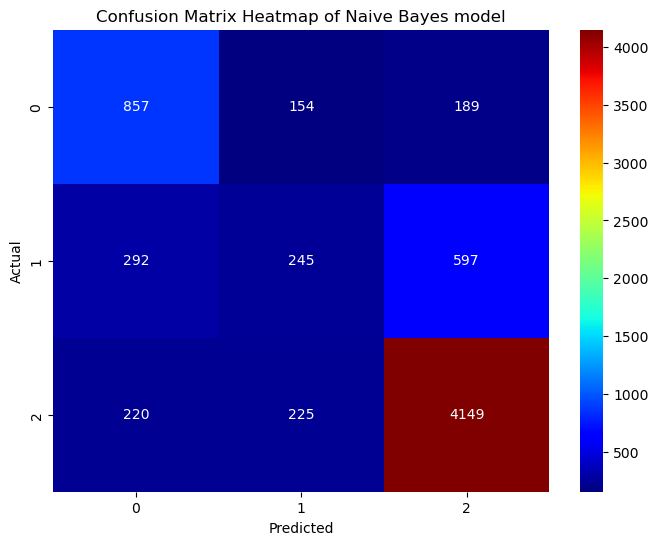

In [18]:
# Generate confusion matrix heatmap

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='jet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap of Naive Bayes model')
plt.show()